# Guided Project

## Predicting Car Prices

The  we will be working with contains information on various cars. We have information for each car about the technical aspects of the vehicle such as the motor's dispalcement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. The detailed information aabout the data set is  [here](https://archive.ics.uci.edu/ml/datasets/automobile)

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


cars =pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The data does not include the column names. Let's add the column name using [__dataset's documentation__](https://archive.ics.uci.edu/ml/datasets/automobile).

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length','width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-sytem',
       'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names= cols)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-sytem,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

The k-nearest neighbors algorithm uses the distance formula to determine the nearest neighbors. That means, we can only use numerical columns for this machine learning.

The following are some issue with the dataframe:

* There are missing value with the string "?".
* There are many non numerical columns

Let's replace the string"?" with NaN and use only the numeric columns

In [4]:
numeric_cols = ['normalized-losses', 'wheel-base','length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate',
               'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[numeric_cols]

In [5]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN


In [7]:
# let's change the column type to float

numeric_cars = numeric_cars.astype('float')
# let's check how many nan value in the dataset
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
#Because 'price' is the column that we want to predict, let's drop aby rows with missing price value

numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
#Replace missing values in other column using the column means

numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [10]:
# Check wether we still have missing values

numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


The k.nearest neighbors algortithm uses the euclidean distance to determine the closest neighbor.

$$Distance = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ...(q_n - p_n)^2}$$

where q and p represent two rows and the subcript representing a column. But please take note that each column have different scaling. For example, the column peak-rpm has a difference of 500, and the difference in width is around 0.7. If we use these two columns as part of k-nearest neighbors model, it could have end up having an outsized effect because of the largeness of the value. Thus we have to normalize the data set. Normalizing the value in each column to value from -1 to 1  preserves the distribution of the values in each column while aligning the scales. 



In [12]:
# Normalize all columns except the target column

normalized_cars = (numeric_cars -numeric_cars.mean())/(numeric_cars.max() - numeric_cars.min())
normalized_cars['price'] = numeric_cars['price']

In [13]:
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


## Univariate Model


In [14]:

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Rnadomize order of rows in data frame
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Divide number of rows in half and round
    half_row = int(len(random_df)/2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    train_df = random_df.iloc[0:half_row]
    test_df = random_df.iloc[half_row:]
    
    # Fit a KNN model using default k value
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make prediction using model
    predicted_labels = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse




We can write a for loop and use the function for each column, so we can see the RMSE of each column

In [15]:
# For each column (minus 'price'), train a model, return RMSE result
features = normalized_cars.columns.drop('price')
rmse_results = {}

for col in features:
    rmse_value= knn_train_test(col, 'price', normalized_cars)
    rmse_results[col]= rmse_value

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()
    

horsepower           4010.414152
curb-weight          4401.118255
highway-mpg          4652.697833
width                4908.609914
city-mpg             4973.940485
length               5429.900973
wheel-base           5460.787788
compression-rate     6610.812153
bore                 6806.695830
normalized-losses    7304.373172
peak-rpm             7678.470979
height               7842.199226
stroke               8005.611387
dtype: float64

It seems the column 'horsepower has the lowest error.

Let's modify the function to include k value or the number of neighbors as a parameter. Then we can loop through a list following k values (1,3,5,7,9) and determine which k value is the most optimal in our model

In [16]:
def knn_train_test(train_col, target_col,df):
    np.random.seed(1)
    
    # Randomize prder of rows in the dataframe
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Divide number of rows in half and round
    half_row = int(len(random_df)/2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    
    train_df = random_df.iloc[0:half_row]
    test_df = random_df.iloc[half_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        # Make predictions using model
        predicted_labels = knn.predict(test_df[[train_col]])
        
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmses_results = {}

#for each column (minus 'price'), train a model, returm RMSE value
# and add to the dictionary k_rmses_results

train_cols = normalized_cars.columns.drop('price')

for col in train_cols:
    rmse_value = knn_train_test(col, 'price', normalized_cars)
    k_rmses_results[col]= rmse_value

k_rmses_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6806.695830075582,
  7: 6939.105845651802,
  9: 6915.297375013411},
 'city-mpg': {1: 5863.190943471308,
  3: 4672.77285307275,
  5: 4973.94048466108,
  7: 5413.390882677539,
  9: 5277.1766643494775},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.6701276238755,
  9: 4633.425879994758},
 'height': {1: 8942.012951995952,
  3: 8378.23385277286,
  5: 7842.199225717336,
  7: 7709.0699416548505,
  9: 7777.1734491607085},
 'highway-mpg': {1: 6022.866724754784,
  3: 4671.390389789466,
  5: 4652.697832525993,
  7: 4817.230104360727,
  9: 5261.877043557105},
 'horsepower': {1: 4170.054848037801,
  3: 3985.1389178696736,
  5: 4010.4141521891734,
  7: 4351.268271181572,
  9: 4514.504641478055},
 'length': {1: 4611.990241761035,
  3: 5129.672039752984

peak-rpm
average_rmse:8122.477154035228
width
average_rmse:4723.406333457191
curb-weight
average_rmse:4735.110369350003
height
average_rmse:8129.737884260341
normalized-losses
average_rmse:7592.985592573221
bore
average_rmse:7249.585404944475
stroke
average_rmse:7990.349766848265
wheel-base
average_rmse:5269.94203029883
city-mpg
average_rmse:5240.0943656464315
highway-mpg
average_rmse:5085.212418997615
horsepower
average_rmse:4206.276166151255
length
average_rmse:5173.30027712448
compression-rate
average_rmse:7166.0735987331045


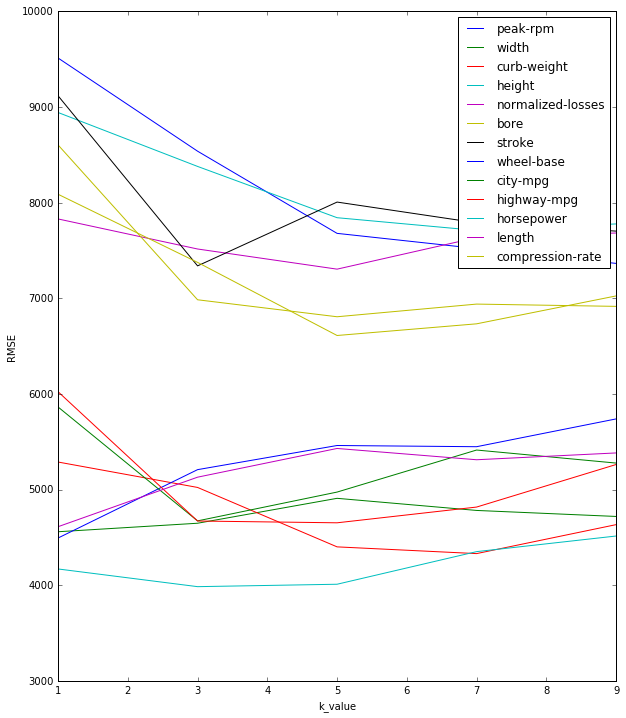

In [17]:
features = {}
plt.figure(figsize=(10,12))

for key, value in k_rmses_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    
    print(key)
    print('average_rmse:' + str(np.mean(y)))
    features[key] = np.mean(y)
    
    plt.plot(x_ordered, y_ordered, label=key)
    plt.xlabel('k_value')
    plt.ylabel('RMSE')
plt.legend()
plt.show()

Let's sort the features which contains the features as the key and the average RMSES as the values

In [18]:
sorted_features = sorted(features, key= features.get)
sorted_features

['horsepower',
 'width',
 'curb-weight',
 'highway-mpg',
 'length',
 'city-mpg',
 'wheel-base',
 'compression-rate',
 'bore',
 'normalized-losses',
 'stroke',
 'peak-rpm',
 'height']

## Multivariate Model

Let's modify the knn_train_test() function we wrote in the last step to work with multiple columns

In [19]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #Randomize order of rows in dataframe
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    # Divide number of rows in half and round
    half_row = int(len(random_df)/2)
    
    #select the first half and set as training set
    #select the second half and set as test set
    train_df = random_df.iloc[0:half_row]
    test_df = random_df.iloc[half_row:]
    

    
    #train
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(train_df[train_cols], train_df[target_col])
        
    # Make predictions using model
    predicted_labels = knn.predict(test_df[train_cols])
        
    #Test
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

k_rmses_features = {}

best_two_features = sorted_features[0:2]
best_three_features = sorted_features[0:3]
best_four_features = sorted_features[0:4]
best_five_features = sorted_features[0:5]

k_rmses_features["best_two_features"]= knn_train_test(best_two_features, 'price', normalized_cars)
k_rmses_features["best_three_features"]= knn_train_test(best_three_features, 'price', normalized_cars)
k_rmses_features["best_four_features"]= knn_train_test(best_four_features, 'price', normalized_cars)
k_rmses_features["best_five_features"]= knn_train_test(best_five_features, 'price', normalized_cars)

In [20]:
k_rmses_features

{'best_five_features': 3665.546673045813,
 'best_four_features': 3358.6915801682458,
 'best_three_features': 3305.9401397969677,
 'best_two_features': 3589.5762113967917}

It seems that the best_three_features has the lowest RMSE.

Let's try varying the k values to find the optimal k value

In [21]:
def knn_train_test(train_cols, target_col, df, k_values):
    #randomize sets
    np.random.seed(0)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    
    half_row = int(len(random_df)/2)
    
    #assign test and train sets
    train_df = random_df.iloc[0:half_row]
    test_df = random_df.iloc[half_row:]
    

    k_rmse = {}
    
    # Training
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        #prediction
        prediction_labels = knn.predict(test_df[train_cols])
        
        #test
        mse = mean_squared_error(test_df[[target_col]], prediction_labels)
        rmse = np.sqrt(mse)
        k_rmse[k]= rmse
    return k_rmse

In [23]:
train_cols = [best_three_features, best_four_features, best_five_features]
k = list(range(1,25))

train_cols_k_rmse = {}

train_cols_k_rmse["best_three_features"]= knn_train_test(best_three_features,'price', normalized_cars,k)
train_cols_k_rmse["best_four_features"]= knn_train_test(best_four_features,'price', normalized_cars, k)
train_cols_k_rmse["best_five_features"]= knn_train_test(best_five_features,'price', normalized_cars, k)


In [24]:
train_cols_k_rmse

{'best_five_features': {1: 2925.271682398335,
  2: 3052.8623032449823,
  3: 3142.306197305374,
  4: 3461.561181031581,
  5: 3533.7489988020734,
  6: 3374.173588712601,
  7: 3375.877721539395,
  8: 3324.876540782833,
  9: 3312.502627933449,
  10: 3366.851324397034,
  11: 3447.2822267103743,
  12: 3496.4998131087186,
  13: 3547.2160454903924,
  14: 3615.6147456955036,
  15: 3579.8430331574878,
  16: 3678.503216850985,
  17: 3750.96940429519,
  18: 3815.3901236791603,
  19: 3851.386198466123,
  20: 3939.9382237297746,
  21: 3975.041007876702,
  22: 4005.3349453198225,
  23: 4054.671493676685,
  24: 4106.550851309336},
 'best_four_features': {1: 2870.800286876242,
  2: 2924.256000834373,
  3: 3217.2983830519292,
  4: 3392.3729838615423,
  5: 3404.6909417321376,
  6: 3532.1939129716366,
  7: 3523.454893817346,
  8: 3405.9189129672363,
  9: 3400.2247346580157,
  10: 3549.4612599577126,
  11: 3539.83054253496,
  12: 3562.1876094096256,
  13: 3675.4563993723814,
  14: 3770.166928307887,
  15: 

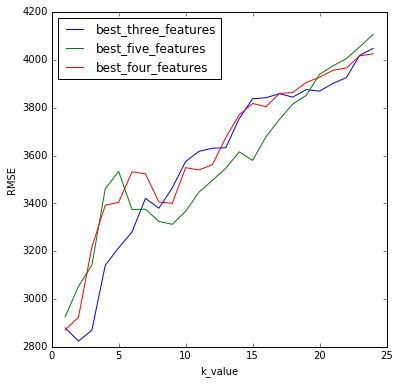

In [30]:
plt.figure(figsize=(6,6))

for key, value in train_cols_k_rmse.items():
    x= list(value.keys())
    y= list(value.values())
    plt.plot(x, y, label=key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")

plt.legend(loc=2)
plt.show()

from the graph above we can see that the best_three_features with k value of 2 has the lowest RMSE with 2824